<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = 'NHL_Data_GA.csv'

### 1. Load the NHL data

In [7]:
# A:
df = pd.read_csv('NHL_Data_GA.csv')

In [8]:
df.head()

Team  PTS  Rank         TOI   GF  GA  GF60  GA60   GF%    SF  ...  \
0  Washington10  121     1  2001:52:00  115  73  3.45  2.19  61.2  1112  ...   
1   Vancouver11  117     1  2056:14:00   94  72  2.74  2.10  56.6  1143  ...   
2    San Jose10  113     1  1929:54:00   90  68  2.80  2.11  57.0  1065  ...   
3     Chicago10  112     1  2020:23:00  104  83  3.09  2.46  55.6  1186  ...   
4   Vancouver12  111     1  2052:02:00   86  74  2.51  2.16  53.8  1078  ...   

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  58.1  2093  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  51.0  2085  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 28 columns]

### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A:

In [9]:
df.shape

(90, 28)

In [26]:
df.columns = df.columns.str.lower()

In [89]:
# Rename rank because it's a function
df.rename(columns={'rank':'hrank'},inplace=True)

In [90]:
df.dtypes

team      object
pts        int64
hrank      int64
gf         int64
ga         int64
gf60     float64
ga60     float64
gf%      float64
sf         int64
sa         int64
sf60     float64
sa60     float64
sf%      float64
ff         int64
fa         int64
ff60     float64
fa60     float64
ff%      float64
cf         int64
ca         int64
cf60     float64
ca60     float64
cf%      float64
sh%      float64
sv%      float64
pdo        int64
pim        int64
hoi      float64
dtype: object

In [28]:
round(df.describe(include='all'),1).transpose()

count unique         top freq    mean    std   min     25%     50%  \
team    90     90  Columbus12    1     NaN    NaN   NaN     NaN     NaN   
pts     90    NaN         NaN  NaN      92   12.5    62    82.2    92.5   
rank    90    NaN         NaN  NaN       2    0.8     1       1       2   
toi     90     90  2046:20:00    1     NaN    NaN   NaN     NaN     NaN   
gf      90    NaN         NaN  NaN    83.3   10.4    57      76      84   
ga      90    NaN         NaN  NaN    83.3    9.7    64    75.5      84   
gf60    90    NaN         NaN  NaN     2.4    0.3   1.7     2.2     2.4   
ga60    90    NaN         NaN  NaN     2.4    0.3   1.7     2.2     2.5   
gf%     90    NaN         NaN  NaN      50    4.6    38    46.8    49.7   
sf      90    NaN         NaN  NaN  1068.3   95.9   815  1011.5    1072   
sa      90    NaN         NaN  NaN  1068.3   75.5   868  1022.2    1072   
sf60    90    NaN         NaN  NaN    31.3    2.2  25.8    29.6    31.4   
sa60    90    NaN         NaN  NaN    31.3    2.1  25.8    29.8    31.5   
sf%     90    NaN         NaN  NaN      50    2.8  43.2    48.3    50.2   
ff      90    NaN         NaN  NaN  1475.4  129.9  1138  1380.8  1474.5   
fa      90    NaN         NaN  NaN  1475.4    109  1151  1409.5  1477.5   
ff60    90    NaN         NaN  NaN    43.2      3    36    40.9    43.4   
fa60    90    NaN         NaN  NaN    43.2      3  34.2    41.3    43.4   
ff%     90    NaN         NaN  NaN      50    2.8  43.1    47.8      50   
cf      90    NaN         NaN  NaN  1973.5  176.5  1565  1855.2  1981.5   
ca      90    NaN         NaN  NaN  1973.5  154.1  1572    1877    1961   
cf60    90    NaN         NaN  NaN    57.7    4.1  49.5    54.3      58   
ca60    90    NaN         NaN  NaN    57.8    4.3  46.7    54.6    58.4   
cf%     90    NaN         NaN  NaN      50    2.8  43.7    47.9    50.4   
sh%     90    NaN         NaN  NaN     7.8    0.9   5.9     7.2     7.7   
sv%     90    NaN         NaN  NaN    92.2    0.9  89.8    91.6    92.2   
pdo     90    NaN         NaN  NaN    1000   12.3   978     992  1000.5   
pim     90    NaN         NaN  NaN     991    178   689   881.2     960   

         75%   max  
team     NaN   NaN  
pts      102   121  
rank       3     3  
toi      NaN   NaN  
gf        90   115  
ga        89   107  
gf60     2.6   3.4  
ga60     2.7   3.2  
gf%     53.6  61.2  
sf      1143  1311  
sa    1125.8  1245  
sf60    32.8  35.6  
sa60    32.9  35.9  
sf%     51.7  57.7  
ff    1566.2  1762  
fa      1551  1735  
ff60    45.5  49.5  
fa60    45.2  50.5  
ff%     51.8  58.1  
cf    2112.8  2341  
ca    2077.2  2332  
cf60    60.8  64.9  
ca60    60.4  67.5  
cf%       52  57.1  
sh%      8.3  10.3  
sv%     92.9  93.9  
pdo   1007.8  1034  
pim   1101.5  1515

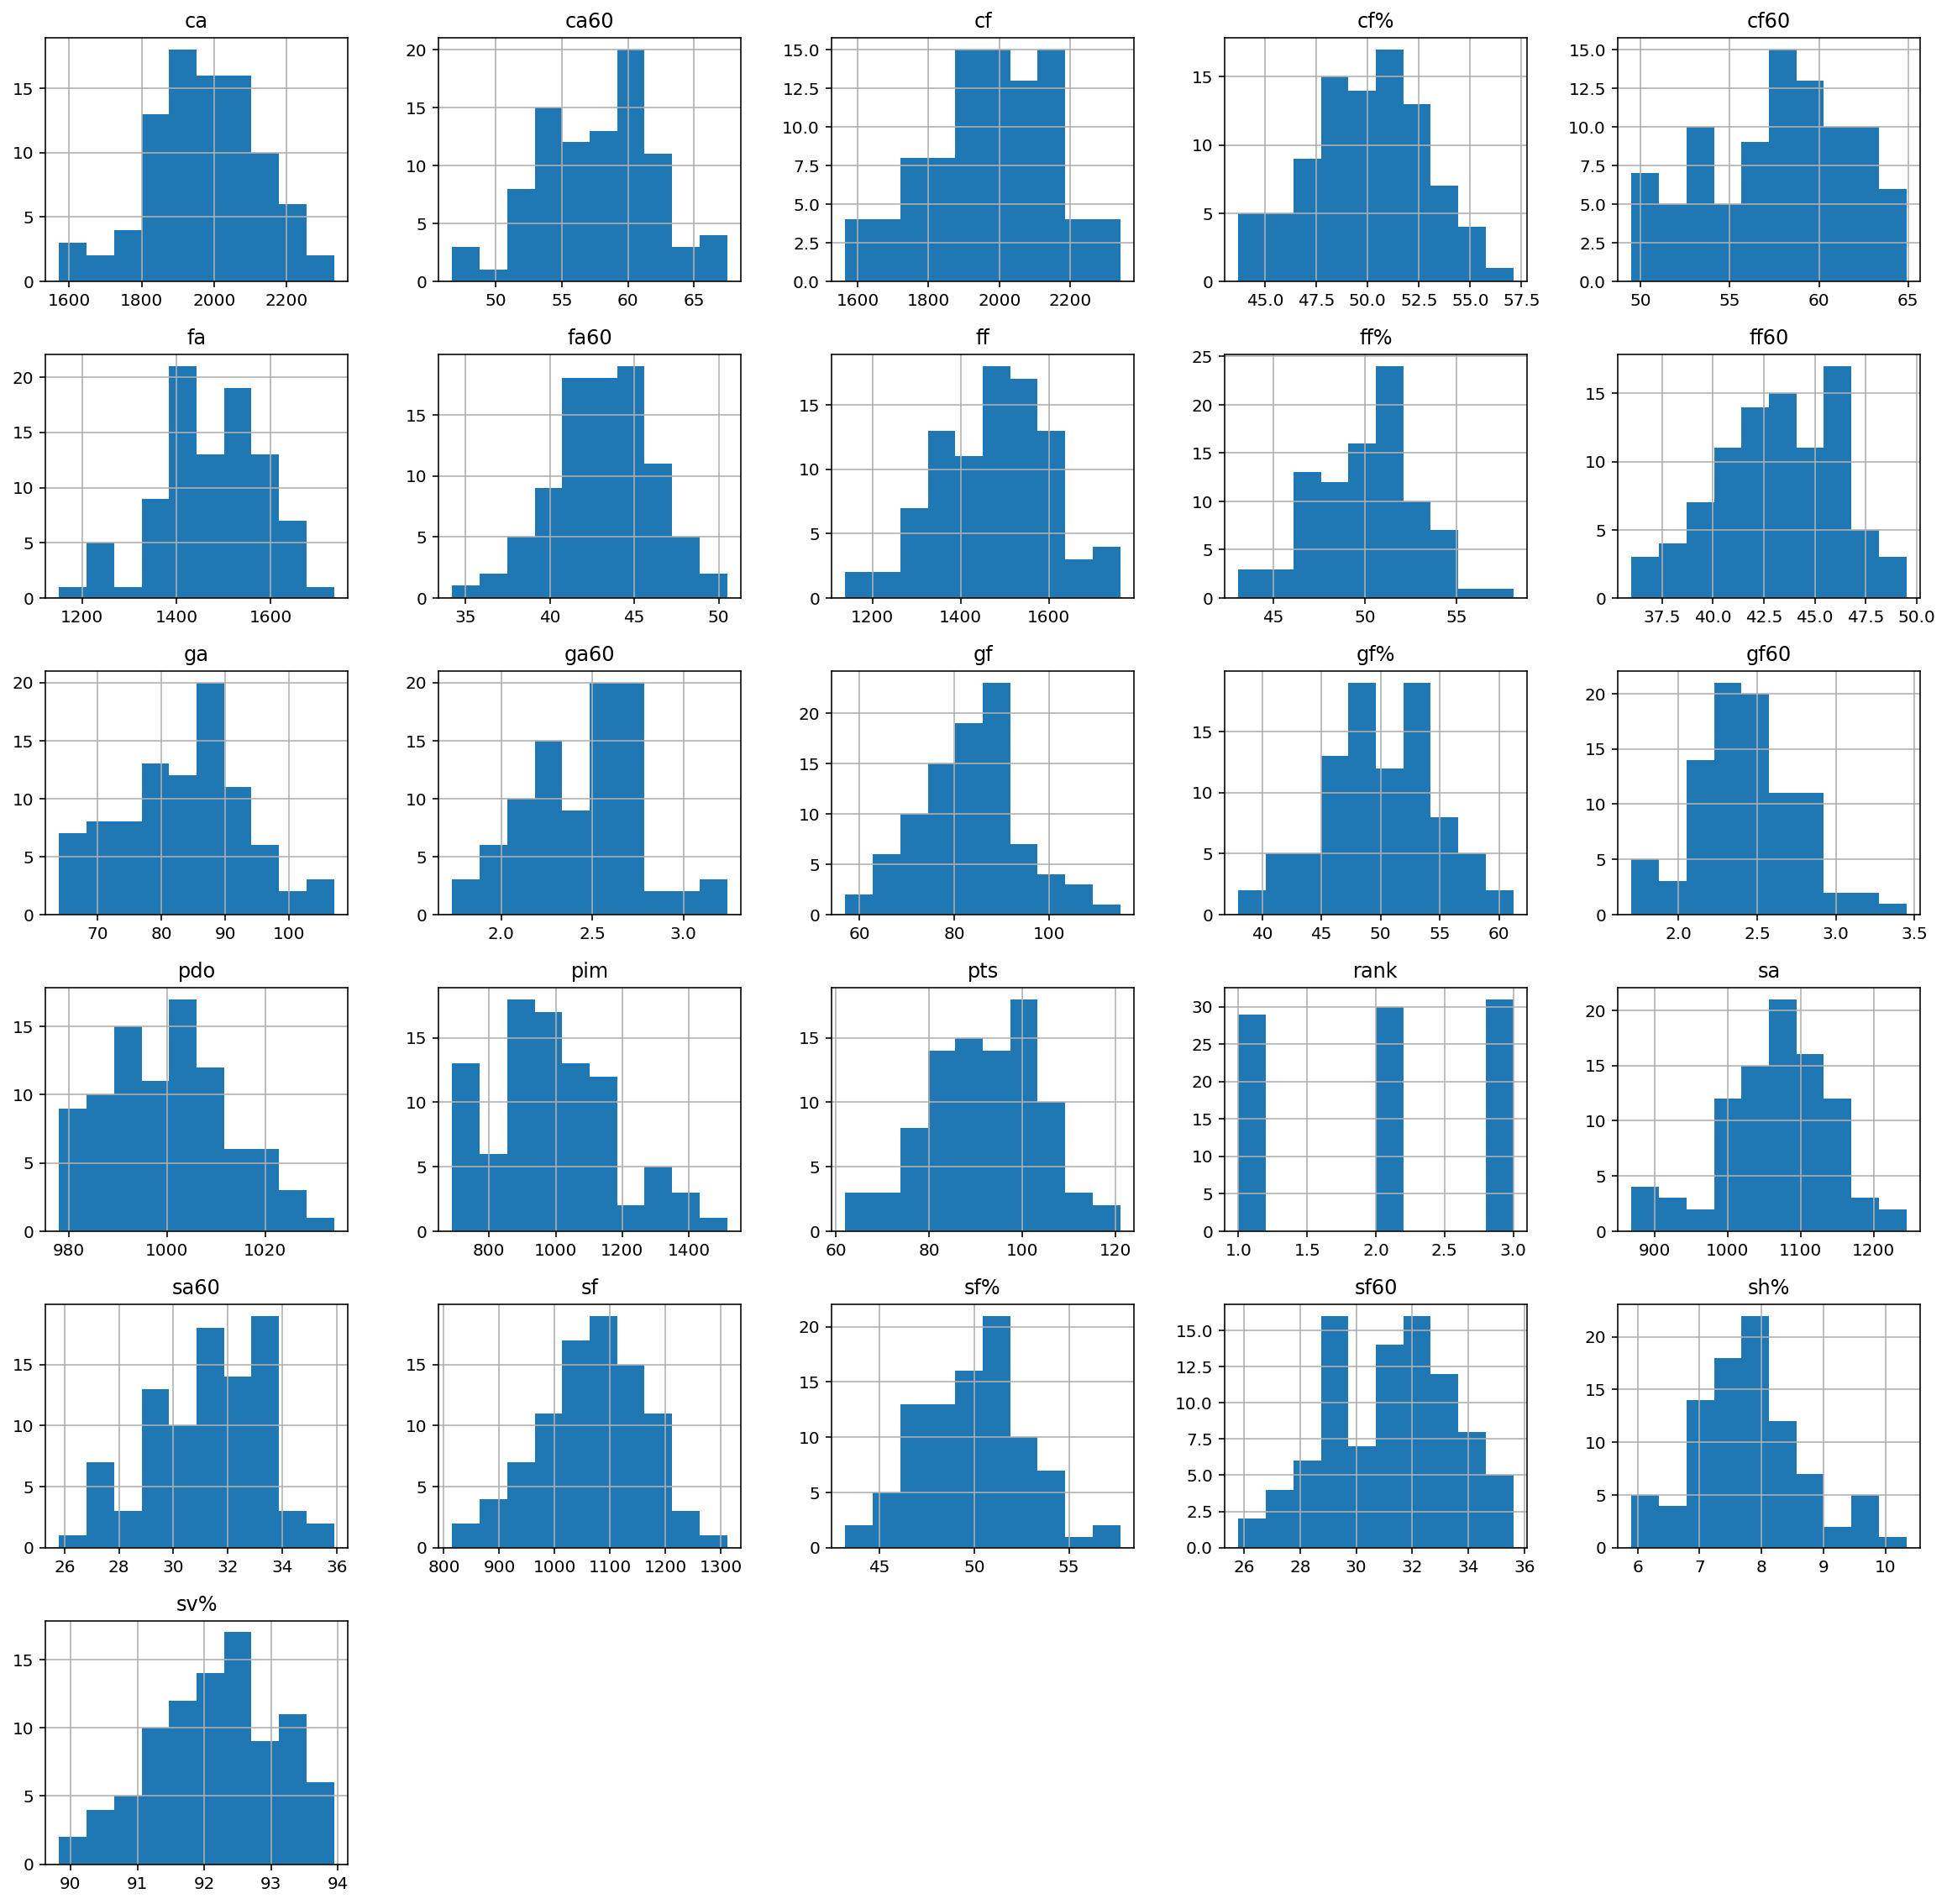

In [54]:
df.hist(figsize=(20,20));

#### What is toi? 

In [55]:
df.toi.value_counts()

2046:20:00    1
2245:54:00    1
2061:44:00    1
1984:21:00    1
2079:44:00    1
             ..
1914:22:00    1
2007:11:00    1
2048:28:00    1
1969:30:00    1
2155:11:00    1
Name: toi, Length: 90, dtype: int64

In [93]:
df.head(10)

team  pts  hrank   gf  ga  gf60  ga60   gf%    sf    sa  ...    cf  \
0  Washington10  121      1  115  73  3.45  2.19  61.2  1112  1047  ...  2138   
1   Vancouver11  117      1   94  72  2.74  2.10  56.6  1143  1053  ...  2144   
2    San Jose10  113      1   90  68  2.80  2.11  57.0  1065  1039  ...  1985   
3     Chicago10  112      1  104  83  3.09  2.46  55.6  1186   868  ...  2093   
4   Vancouver12  111      1   86  74  2.51  2.16  53.8  1078  1115  ...  2085   
5  NY Rangers12  109      1   86  73  2.26  1.92  54.1  1096  1075  ...  2022   
6   St. Louis12  109      1   87  65  2.31  1.73  57.2  1211  1015  ...  2252   
7  Pittsburgh12  108      1   93  88  2.87  2.72  51.4  1135   880  ...  2082   
8     Phoenix10  107      1   75  67  2.16  1.93  52.8  1087  1017  ...  2002   
9  Washington11  107      1   84  78  2.32  2.16  51.8  1152  1113  ...  2185   

     ca  cf60  ca60   cf%    sh%    sv%   pdo   pim          hoi  
0  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  2001.866667  
1  1870  62.6  54.6  53.4   8.22  93.16  1014   985  2056.233333  
2  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  1929.900000  
3  1572  62.2  46.7  57.1   8.77  90.44   992   966  2020.383333  
4  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  2052.033333  
5  2135  53.2  56.2  48.6   7.85  93.21  1011  1059  2280.483333  
6  1924  59.9  51.1  53.9   7.18  93.60  1008  1062  2256.916667  
7  1690  64.3  52.2  55.2   8.19  90.00   982   880  1942.300000  
8  1894  57.7  54.6  51.4   6.90  93.41  1003  1362  2082.400000  
9  2119  60.5  58.6  50.8   7.29  92.99  1003   943  2168.133333  

[10 rows x 28 columns]

In [ ]:
# Time on Ice?

In [73]:
# Create Hours on Ice Variable
df['hoi'] = df.toi.str[0:4].astype(int) + (df.toi.str[5:7].astype(int) / 60)

In [74]:
# Drop Time on Ice Variable
df.drop(columns='toi',inplace=True)

In [76]:
df.head()

team  pts  rank   gf  ga  gf60  ga60   gf%    sf    sa  ...    cf  \
0  Washington10  121     1  115  73  3.45  2.19  61.2  1112  1047  ...  2138   
1   Vancouver11  117     1   94  72  2.74  2.10  56.6  1143  1053  ...  2144   
2    San Jose10  113     1   90  68  2.80  2.11  57.0  1065  1039  ...  1985   
3     Chicago10  112     1  104  83  3.09  2.46  55.6  1186   868  ...  2093   
4   Vancouver12  111     1   86  74  2.51  2.16  53.8  1078  1115  ...  2085   

     ca  cf60  ca60   cf%    sh%    sv%   pdo   pim          hoi  
0  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  2001.866667  
1  1870  62.6  54.6  53.4   8.22  93.16  1014   985  2056.233333  
2  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  1929.900000  
3  1572  62.2  46.7  57.1   8.77  90.44   992   966  2020.383333  
4  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  2052.033333  

[5 rows x 28 columns]

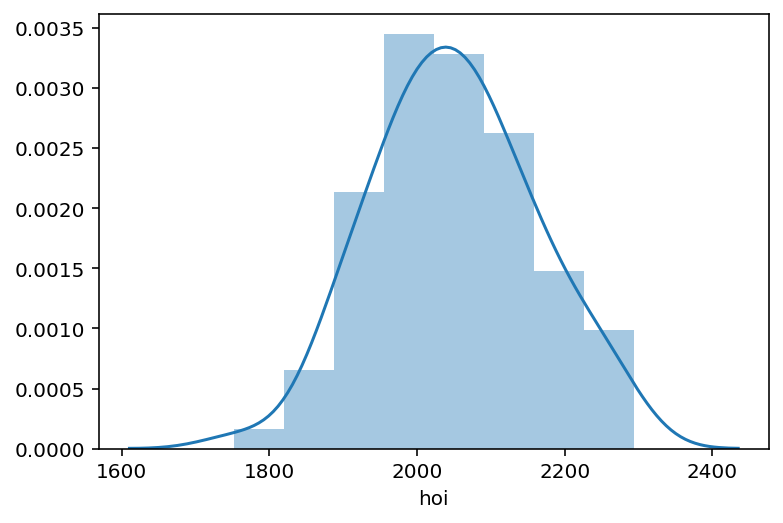

In [94]:
sns.distplot(df.hoi)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [5]:
# A:

In [92]:
df.hrank.value_counts()

3    31
2    30
1    29
Name: hrank, dtype: int64

### 4. What is the baseline accuracy?

In [6]:
# A:

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [7]:
# A:

In [95]:
sns.pairplot(df, hue='hrank')

Text(0.5, 1.0, 'pts')

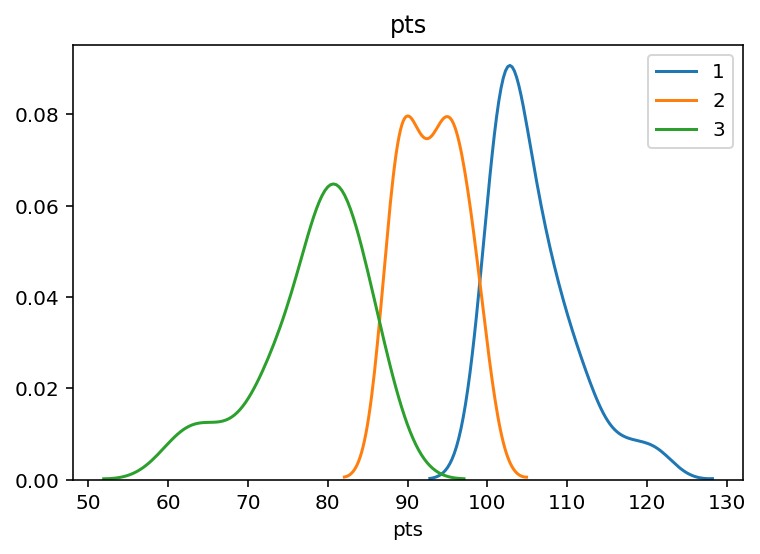

In [115]:
sns.distplot(a=df[df.hrank == 1].pts, label='1', hist=False)
sns.distplot(a=df[df.hrank == 2].pts, label='2', hist=False)
sns.distplot(a=df[df.hrank == 3].pts, label='3', hist=False)
plt.title('pts')

Text(0.5, 1.0, 'gf')

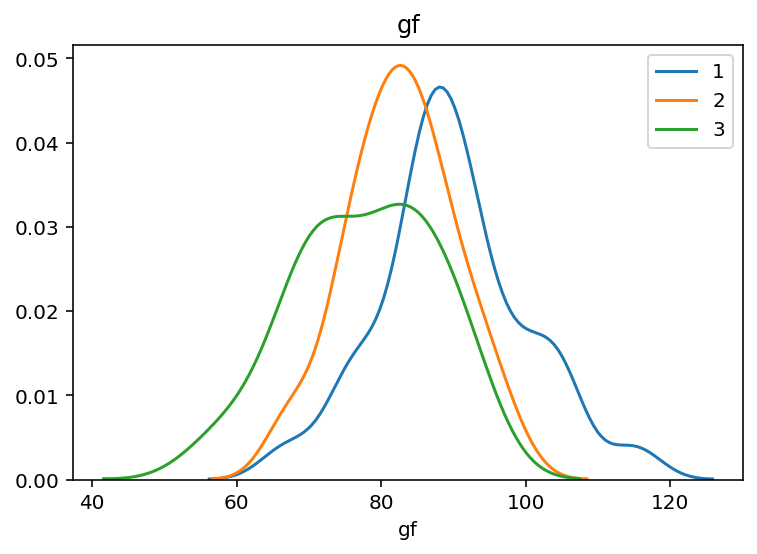

In [114]:
sns.distplot(a=df[df.hrank == 1].gf, label='1', hist=False)
sns.distplot(a=df[df.hrank == 2].gf, label='2', hist=False)
sns.distplot(a=df[df.hrank == 3].gf, label='3', hist=False)
plt.title('gf')

In [129]:
df = df[['hrank', 'team', 'pts',  'gf', 'ga', 'gf60', 'ga60', 'gf%', 'sf', 'sa',
       'sf60', 'sa60', 'sf%', 'ff', 'fa', 'ff60', 'fa60', 'ff%', 'cf', 'ca',
       'cf60', 'ca60', 'cf%', 'sh%', 'sv%', 'pdo', 'pim', 'hoi']]

In [134]:
len(df.iloc[:,2:].columns)

26

In [135]:
df.iloc[:,2:].columns

Index(['pts', 'gf', 'ga', 'gf60', 'ga60', 'gf%', 'sf', 'sa', 'sf60', 'sa60',
       'sf%', 'ff', 'fa', 'ff60', 'fa60', 'ff%', 'cf', 'ca', 'cf60', 'ca60',
       'cf%', 'sh%', 'sv%', 'pdo', 'pim', 'hoi'],
      dtype='object')

Text(0.5, 1.0, 'ca')

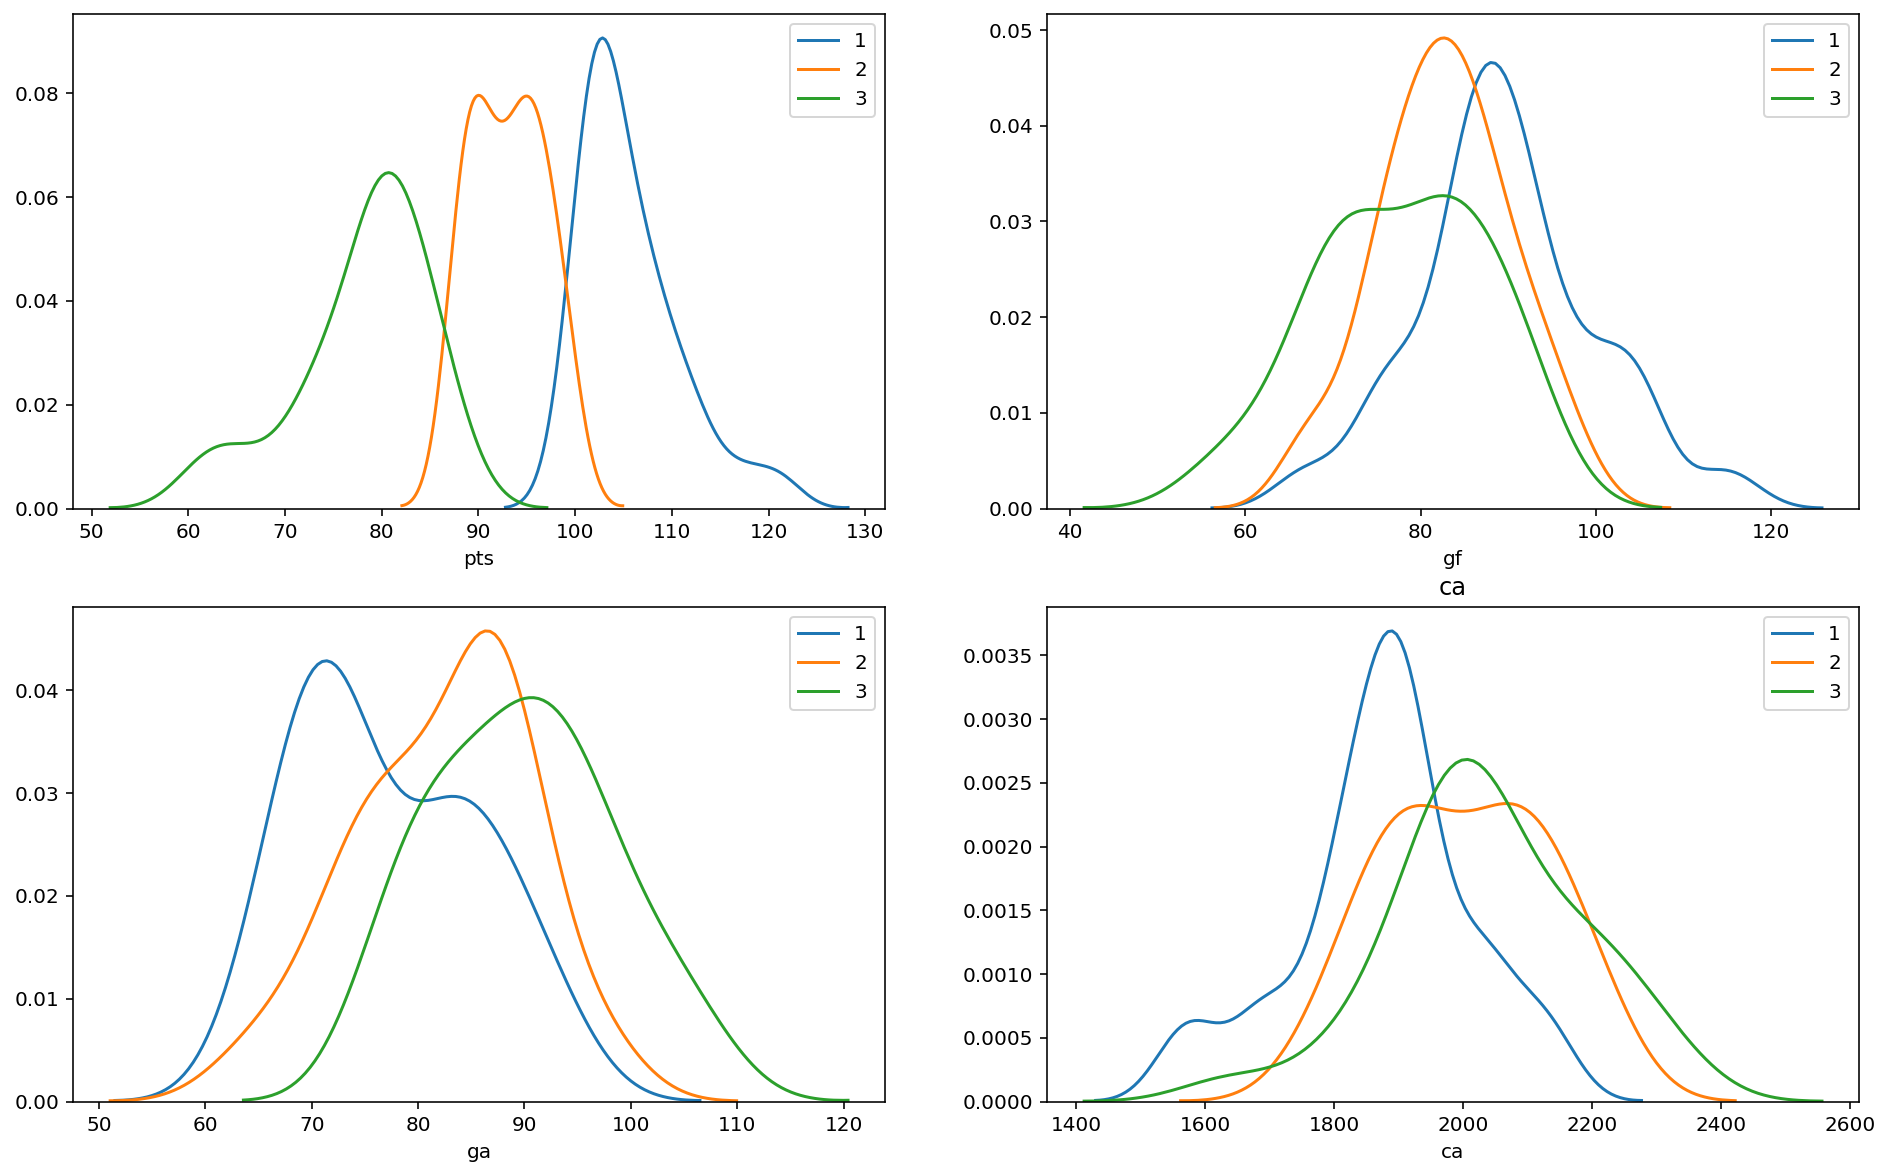

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

sns.distplot(a=df[df.hrank == 1].pts, label='1', hist=False, ax=axes[0,0])
sns.distplot(a=df[df.hrank == 2].pts, label='2', hist=False, ax=axes[0,0])
sns.distplot(a=df[df.hrank == 3].pts, label='3', hist=False, ax=axes[0,0])
plt.title('pts')

sns.distplot(a=df[df.hrank == 1].gf, label='1', hist=False, ax=axes[0,1])
sns.distplot(a=df[df.hrank == 2].gf, label='2', hist=False, ax=axes[0,1])
sns.distplot(a=df[df.hrank == 3].gf, label='3', hist=False, ax=axes[0,1])
plt.title('gf')

sns.distplot(a=df[df.hrank == 1].ga, label='1', hist=False, ax=axes[1,0])
sns.distplot(a=df[df.hrank == 2].ga, label='2', hist=False, ax=axes[1,0])
sns.distplot(a=df[df.hrank == 3].ga, label='3', hist=False, ax=axes[1,0])
plt.title('ga')

sns.distplot(a=df[df.hrank == 1].ca, label='1', hist=False, ax=axes[1,1])
sns.distplot(a=df[df.hrank == 2].ca, label='2', hist=False, ax=axes[1,1])
sns.distplot(a=df[df.hrank == 3].ca, label='3', hist=False, ax=axes[1,1])
plt.title('ca')

In [172]:
metrics = ['pts', 'gf', 'ga', 'gf60']

n=0
for row in range(2):
    for col in range(2):
        print(row,col,n)
        n+=1

0 0 0
0 1 1
1 0 2
1 1 3


In [169]:
int(np.ceil(len(metrics) / c))

1

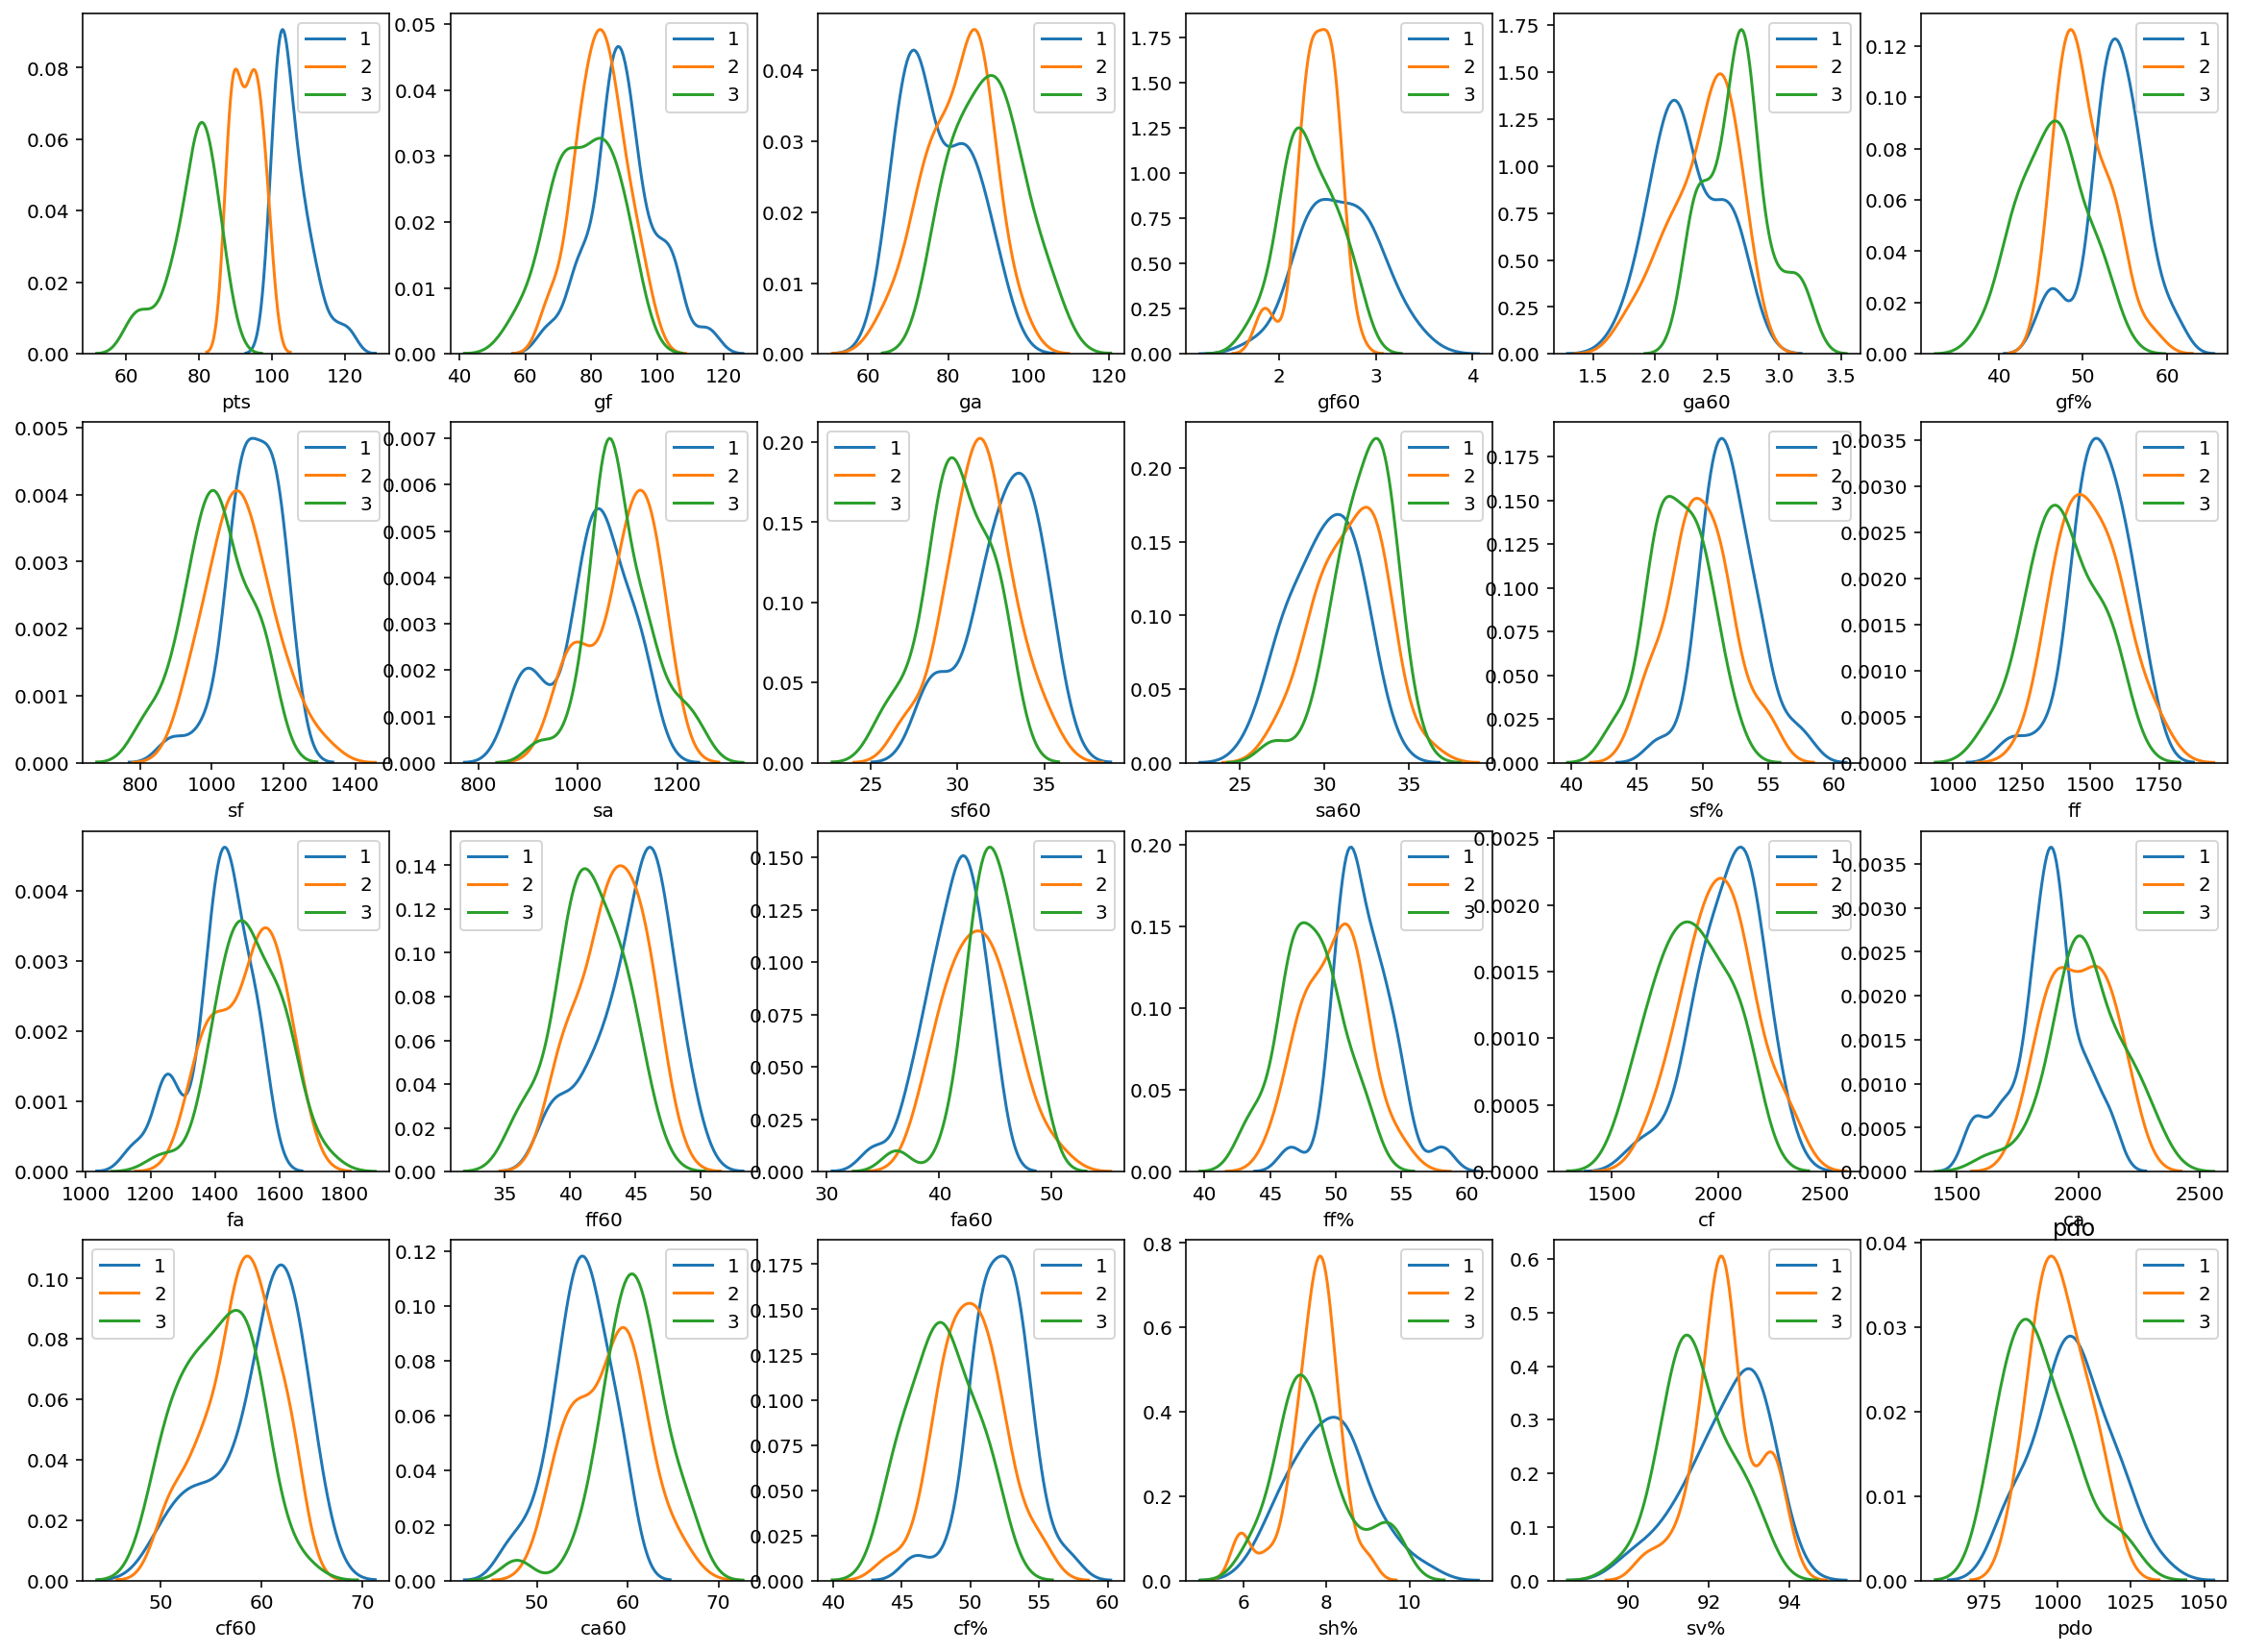

In [190]:
metrics = ['pts', 'gf', 'ga', 'gf60', 'ga60', 'gf%', 'sf', 'sa', 'sf60', 'sa60',
           'sf%', 'ff', 'fa', 'ff60', 'fa60', 'ff%', 'cf', 'ca', 'cf60', 'ca60',
           'cf%', 'sh%', 'sv%', 'pdo', 'pim', 'hoi']
n= 0
# c = 4
# r = np.ceil(len(metrics) / c)

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20,15))

for row in range(4):
    for col in range(6):
        sns.distplot(a=df[df.hrank == 1][metrics[n]], label='1', hist=False, ax=axes[row,col])
        sns.distplot(a=df[df.hrank == 2][metrics[n]], label='2', hist=False, ax=axes[row,col])
        sns.distplot(a=df[df.hrank == 3][metrics[n]], label='3', hist=False, ax=axes[row,col])
        plt.title(metrics[n], pad=2)
        n+=1

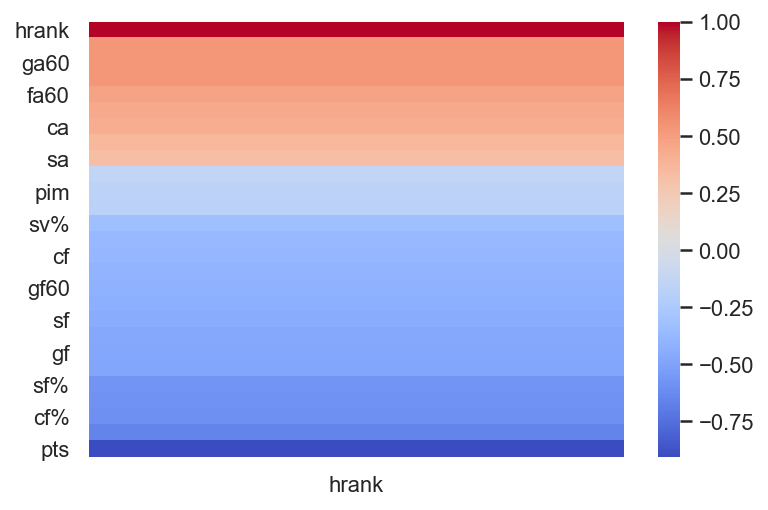

In [206]:

nhl_corr = pd.DataFrame(df.corr()['hrank'].sort_values(ascending=False))
sns.heatmap(nhl_corr, cmap='coolwarm')

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [207]:
# A:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [210]:
# Create Target and Features
fcols = ['pts','cf%','ga60','fa60']
X = df[fcols]
y = df.hrank

# Fit
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Predict
preds = knn.predict(X)

In [211]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [215]:
# A:
(y == preds).sum() / len(y)

1.0

No it's not legit bc we are prediciting the exact same data we trained on with only 1 NN. The 1 NN is always going to be the exact data point from the training set

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [10]:
# A:

In [219]:
fcols = ['pts','cf%','ga60','fa60']
X = df[fcols]
y = df.hrank

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.5)

# Fit
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict
preds = knn.predict(X_test)

In [221]:
(y_test == preds ).sum() / len(y_test)

0.8666666666666667

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [237]:
# A:
fcols = ['pts','cf%','ga60','fa60']
X = df[fcols]
y = df.hrank

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.5)

r = range(1,len(X_train)+1)
preds = []
for k in r:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict
    pred = knn.predict(X_test)
    preds.append((y_test == pred ).sum() / len(y_test))

In [244]:
list(zip(r,preds))

[(1, 0.8666666666666667),
 (2, 0.9111111111111111),
 (3, 0.9333333333333333),
 (4, 0.9111111111111111),
 (5, 0.8888888888888888),
 (6, 0.8444444444444444),
 (7, 0.8222222222222222),
 (8, 0.8),
 (9, 0.7777777777777778),
 (10, 0.7333333333333333),
 (11, 0.7777777777777778),
 (12, 0.7777777777777778),
 (13, 0.7777777777777778),
 (14, 0.7333333333333333),
 (15, 0.6888888888888889),
 (16, 0.6888888888888889),
 (17, 0.7111111111111111),
 (18, 0.6222222222222222),
 (19, 0.6222222222222222),
 (20, 0.6222222222222222),
 (21, 0.6222222222222222),
 (22, 0.5777777777777777),
 (23, 0.5333333333333333),
 (24, 0.5333333333333333),
 (25, 0.5333333333333333),
 (26, 0.5333333333333333),
 (27, 0.5333333333333333),
 (28, 0.5333333333333333),
 (29, 0.5333333333333333),
 (30, 0.5333333333333333),
 (31, 0.5333333333333333),
 (32, 0.5333333333333333),
 (33, 0.5333333333333333),
 (34, 0.5333333333333333),
 (35, 0.5333333333333333),
 (36, 0.5333333333333333),
 (37, 0.5333333333333333),
 (38, 0.5333333333333333)

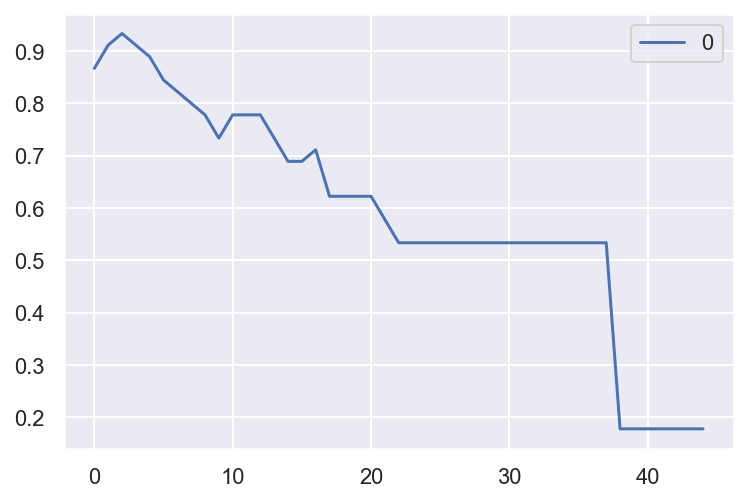

In [254]:
pd.DataFrame(preds).plot()

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [12]:
# A: Whoops did this above

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [255]:
# A:

In [257]:
from sklearn.model_selection import cross_val_score

In [260]:
# A:
fcols = ['pts','cf%','ga60','fa60']
X = df[fcols]
y = df.hrank

r = range(1,len(X_train)+1)
scores = []

for k in r:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    scores.append(score.mean())

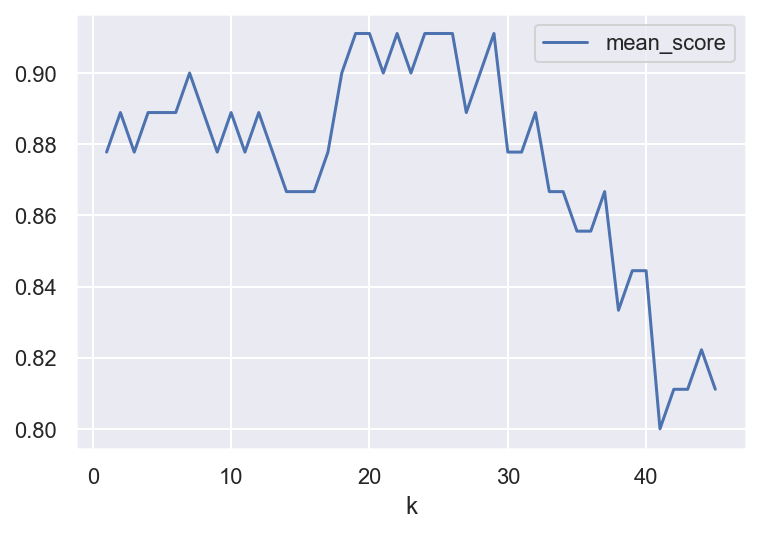

In [274]:
data = pd.DataFrame(enumerate(scores, start=1),columns=['k','mean_score'])
data.plot(x='k', y='mean_score')

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A:

In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fcols = ['pts','cf%','ga60','fa60']
scaler.fit_transform(df[fcols])
#scaler.transform(df[fcols])
X = scaler.transform(df[fcols])
y = df.hrank

In [283]:
r = range(1,len(X_train)+1)
scores = []

for k in r:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    scores.append(score.mean())

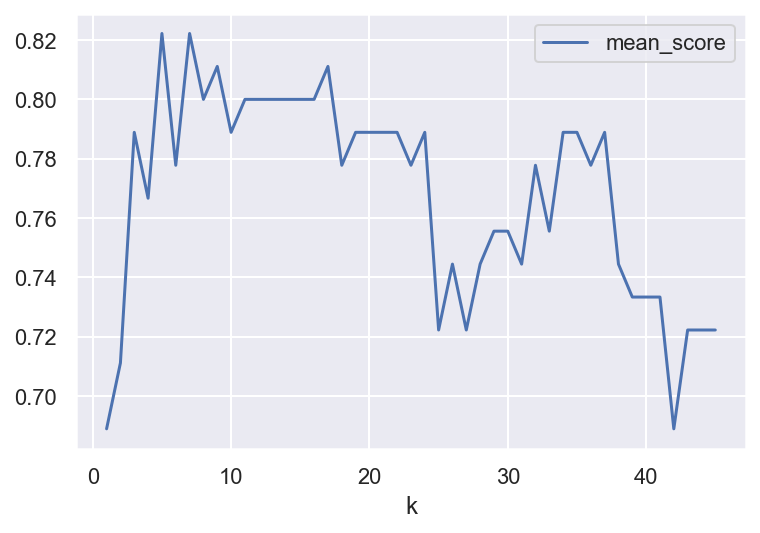

In [284]:
data = pd.DataFrame(enumerate(scores, start=1),columns=['k','mean_score'])
data.plot(x='k', y='mean_score')